In [2]:
import os

import numpy as np

from time import time
from astropy.table import Table

from model_predictions import precompute_lensing_pairs
from prepare_universe_machine import precompute_lensing_pairs

Test for precompute weak lensing pairs for simulated galaxies

For SMDPL simulation:

* Hubble factor: `h0 = 0.6777`
* Particle mass: `m_particle = 9.63E7` Msun/h
* Number of particles per dimension: `n_particles_per_dim` = 3840
* Box size: `box_size = 400` Mpc/h 
    
For precompute, we are going to calculate the enclosed mass in 22 bins between 0.08 to 50 Mpc/h in log-linear space.

In [73]:
# Input table
um_smdpl_dir = '/Users/song/astro5/massive/dr16a/um2/um2_new'
#um_smdpl_dir = '/Users/song/data/massive/dr16a/um2/um2_new'
um_smdpl_ptbl = os.path.join(um_smdpl_dir,
                             'um_smdpl_particles_0.7124_50m.npy')
um_smdpl_gtbl = os.path.join(um_smdpl_dir,
                             'um_smdpl_0.7124_new_vagc_mpeak_11.5.npy')

sim_particles = Table(np.load(um_smdpl_ptbl))
um_mock = Table(np.load(um_smdpl_gtbl))

um_mock_demo = um_mock[:500]

# Output file
um_smdpl_precompute = 'um_smdpl_precompute_wl_demo.npy'

In [72]:
len(um_mock)

806306

In [74]:
um_smdpl_ptbl_2 = os.path.join(um_smdpl_dir,
                               'um_smdpl_particles_0.7124_10m.npy')
sim_particles_2 = Table(np.load(um_smdpl_ptbl_2))

In [75]:
um_mock_precompute_demo = precompute_wl_smdpl(um_mock_demo, 
                                              sim_particles)

#   The simulation particle mass is 96300000.000000
#   The number of particles is 56623104000
Total runtime for 500 galaxies and 5.0e+07 particles =35.58 seconds


In [76]:
um_mock_precompute_demo_2 = precompute_wl_smdpl(um_mock_demo, 
                                                sim_particles_2)

#   The simulation particle mass is 96300000.000000
#   The number of particles is 56623104000
Total runtime for 500 galaxies and 1.0e+07 particles =6.38 seconds


In [35]:
np.save(um_smdpl_precompute, um_mock_precompute_demo)

In [36]:
um_test = np.load(um_smdpl_precompute)

In [61]:
r_bins = np.logspace(np.log10(0.08), np.log10(50), 22)

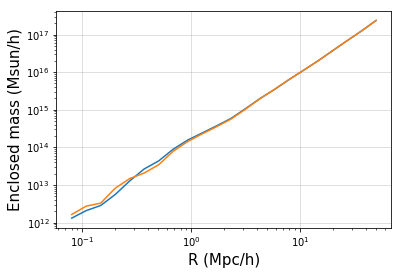

In [68]:
import matplotlib.pyplot as plt

plt.loglog(r_bins, um_mock_precompute_demo[0])
plt.loglog(r_bins, um_mock_precompute_demo_2[0])

plt.grid(zorder=0, alpha=0.5)

plt.xlabel('R (Mpc/h)', fontsize=15)
plt.ylabel('Enclosed mass (Msun/h)', fontsize=15)

plt.show()

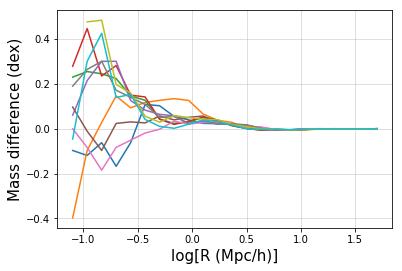

In [71]:
for prof1, prof2 in zip(um_mock_precompute_demo, um_mock_precompute_demo_2):
    plt.plot(np.log10(r_bins), 
             np.log10(prof1) - np.log10(prof2))
    
plt.grid(zorder=0, alpha=0.5)

plt.xlabel('log[R (Mpc/h)]', fontsize=15)
plt.ylabel('Mass difference (dex)', fontsize=15)

    
plt.show()